<b> Loading basic libraries </b>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


<b> Loading IRIS data </b>

In [2]:
# Import datasets library from sklearn
from sklearn import datasets

# Load IRIS dataset

iris = datasets.load_iris()

In [3]:
# Print the label species

print(iris.feature_names)

# Print classes

print(iris.target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [4]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [5]:
df = pd.DataFrame(iris.data, columns= iris.feature_names)

In [6]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
df['species'] = iris.target

In [8]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [9]:
df = df.rename(columns={'sepal length (cm)' : 'sepallength',
                        'sepal width (cm)' : 'sepalwidth',
                        'petal length (cm)' : 'petallength',
                        'petal width (cm)' : 'petalwidth'})

df.head()

,sepallength,sepalwidth,petallength,petalwidth,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [10]:
# Split data into train and test datasets
from sklearn.model_selection import train_test_split

#x = df[['sepallength'],['sepalwidth'],['petallength'],['petalwidth']]

#y = df['species']

x = df.iloc[:, 0:4]
y = df.iloc[:, 4]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state= 0)

In [11]:
# Apply Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100)

In [12]:
# Train the model

clf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [13]:
# Predit the model

y_predict = clf.predict(x_test)

In [14]:
# Test accuracry of the model

from sklearn import metrics

print(metrics.accuracy_score(y_test,y_predict))

0.9777777777777777


In [15]:

clf.predict([[3,5,4,2]])

array([2])

In [41]:
from collections import OrderedDict
RANDOM_STATE = 123

# Generate a binary classification dataset.
#X, y = make_classification(n_samples=500, n_features=25,
#                           n_clusters_per_class=1, n_informative=15,
#                          random_state=RANDOM_STATE)

# NOTE: Setting the `warm_start` construction parameter to `True` disables
# support for parallelized ensembles but is necessary for tracking the OOB
# error trajectory during training.
ensemble_clfs = [
    ("RandomForestClassifier,<br>max_features='sqrt'",
        RandomForestClassifier(warm_start=True, oob_score=True,
                               max_features="sqrt",
                               random_state=RANDOM_STATE)),
    ("RandomForestClassifier,<br>max_features='log2'",
        RandomForestClassifier(warm_start=True, max_features='log2',
                               oob_score=True,
                               random_state=RANDOM_STATE)),
    ("RandomForestClassifier,<br>max_features=None",
        RandomForestClassifier(warm_start=True, max_features=None,
                               oob_score=True,
                               random_state=RANDOM_STATE))
]

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of `n_estimators` values to explore.
min_estimators = 15
max_estimators = 300
data = []
itr = []
for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i)
        clf.fit(x, y)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))
        #print('Tree :', i)
        #print('OOB Error :',oob_error)
        data.append(oob_error)
        itr.append(i)
        


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:463: RuntimeWarning:

invalid value encountered in true_divide

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:463: RuntimeWarning:

invalid value encountered in true_divide

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:463: RuntimeWarning:

invalid value

In [60]:
temp = np.arange(0, 300, 1)

it = pd.DataFrame(temp)

it.shape

dt = pd.DataFrame(data)

In [84]:
DF = it.copy()

DF['oob_error'] = dt


DF['n_estimators'] = it

DF = DF.drop(DF.columns[0], axis = 1)

DF.shape

(300, 2)

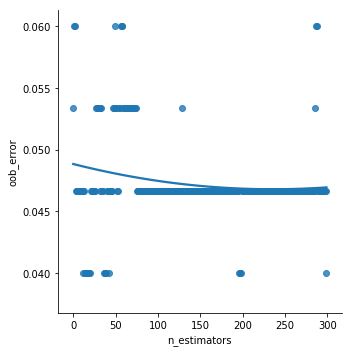

In [89]:
#plt.plot(it, dt.iloc[450:750])
sns.lmplot(x = 'n_estimators', y = 'oob_error', data=DF, ci=None, order=2, truncate=True)
plt.show()

In [86]:
DF.columns

Index(['oob_error', 'n_estimators'], dtype='object')

In [90]:
DF

,oob_error,n_estimators
0,0.053333,0
1,0.060000,1
2,0.060000,2
3,0.046667,3
4,0.046667,4
5,0.046667,5
6,0.046667,6
7,0.046667,7
8,0.046667,8
9,0.046667,9


In [91]:
for i in range(15,31):
    print(i)

15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30


In [97]:
print(clf.oob_score_)

0.9533333333333334
